# P A C K A G E  C O M P A R I S O N

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing bayexpress results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb

RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

# we don't loose any genes here for nans
# RALL_bayexpress = RALL_bayexpress.dropna(subset=['BF', 'FC'])

# criteria 0 for significance: (BF > 1) & (abs(FC) > 0)
RALL_bayexpress['FC0_bayexpress'] = (RALL_bayexpress.BF > 1) & (abs(RALL_bayexpress.FC) > 0)

# criteria 1 for significance: (BF > 1) & (abs(FC) > 1)
RALL_bayexpress['FC1_bayexpress'] = (RALL_bayexpress.BF > 1) & (abs(RALL_bayexpress.FC) > 1)

# criteria 2 for significance: (BF > 1) & (abs(FC) > 2)
RALL_bayexpress['FC2_bayexpress'] = (RALL_bayexpress.BF > 1) & (abs(RALL_bayexpress.FC) > 2)

RALL_bayexpress

,locus_name,BF,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
0,15S_rRNA,-3.710645,0.274047,False,False,False
1,21S_rRNA,-1.302642,0.147177,False,False,False
2,HRA1,-5.206545,-0.564787,False,False,False
3,ICR1,76.746125,0.504048,True,False,False
4,LSR1,0.451012,0.120243,False,False,False
...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,False,False,False
7122,tY(GUA)M1,-7.406574,0.022303,False,False,False
7123,tY(GUA)M2,-7.727890,0.183767,False,False,False
7124,tY(GUA)O,-7.622253,0.347266,False,False,False


In [3]:
# importing edgeR results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb

RALL_edgeR = pd.read_csv('DGE_results/RALL_edgeR.csv').rename(columns={'genes': "locus_name"})

# we don't loose any genes here for nans
# RALL_edgeR = RALL_edgeR.dropna(subset=['logFC', 'PValue'])


# criteria 0 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 0)
RALL_edgeR['FC0_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 0)

# criteria 1 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 1)
RALL_edgeR['FC1_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 1)

# criteria 2 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 2)
RALL_edgeR['FC2_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 2)


RALL_edgeR

,locus_name,logFC,logCPM,F,PValue,FDR,FC0_edgeR,FC1_edgeR,FC2_edgeR
0,YIL121W,-2.833992,6.681355,1.386945e+04,2.777616e-99,1.692679e-95,True,True,True
1,YDR033W,-3.765441,8.923851,1.145528e+04,1.270559e-95,3.871394e-92,True,True,True
2,YML123C,-4.669678,9.152594,1.047574e+04,6.503511e-94,1.321080e-90,True,True,True
3,YGR234W,-4.211960,8.462599,9.269418e+03,1.413441e-91,2.153377e-88,True,True,True
4,YOR290C,-7.557562,6.530807,9.001718e+03,5.125292e-91,6.246706e-88,True,True,True
...,...,...,...,...,...,...,...,...,...
6089,YDR126W,0.000404,4.625602,6.408700e-05,9.936306e-01,9.942833e-01,False,False,False
6090,YHR117W,0.000108,6.355627,3.024605e-05,9.956243e-01,9.961147e-01,False,False,False
6091,YMR123W,-0.000163,6.143127,1.943751e-05,9.964922e-01,9.968193e-01,False,False,False
6092,YGR136W,0.000141,6.616432,1.092446e-05,9.973702e-01,9.975339e-01,False,False,False


In [4]:
# importing DESeq2 results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb


RALL_DESeq2 = pd.read_csv('DGE_results/RALL_DESeq2.csv').rename(columns={'Unnamed: 0': "locus_name"})

# this is a bit crazy but we loose a lot of genes for nans here
RALL_DESeq2 = RALL_DESeq2.dropna(subset=['log2FoldChange', 'pvalue'])

# criteria 0 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 0)
RALL_DESeq2['FC0_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 0)

# criteria 1 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 1)
RALL_DESeq2['FC1_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 1)

# criteria 2 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 2)
RALL_DESeq2['FC2_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 2)

RALL_DESeq2

,locus_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2
0,15S_rRNA,16.994794,-0.136618,0.340703,-0.400988,6.884290e-01,7.313923e-01,False,False,False
1,21S_rRNA,102.643528,-0.243675,0.289561,-0.841533,4.000494e-01,4.548869e-01,False,False,False
2,HRA1,2.550649,-0.851126,0.230477,-3.692895,2.217160e-04,3.651076e-04,True,False,False
3,ICR1,142.961822,0.229845,0.034777,6.609078,3.867198e-11,9.556948e-11,True,False,False
4,LSR1,196.640749,-0.214104,0.162418,-1.318227,1.874278e-01,2.269904e-01,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7120,tY(GUA)J1,0.140228,-0.042322,1.074228,-0.039397,9.685735e-01,9.738411e-01,False,False,False
7121,tY(GUA)J2,0.133175,-0.042322,1.000548,-0.042298,9.662608e-01,9.724756e-01,False,False,False
7122,tY(GUA)M1,0.385050,-0.273708,0.488968,-0.559768,5.756379e-01,6.256143e-01,False,False,False
7123,tY(GUA)M2,0.080417,-0.301508,1.426535,-0.211357,8.326090e-01,8.622913e-01,False,False,False


In [5]:
RALL = pd.DataFrame({'locus_name': RALL_bayexpress.locus_name})

# RALL = pd.concat([RALL, RALL_bayexpress.iloc[:,-2:], RALL_edgeR.iloc[:,-2:], RALL_DESeq2.iloc[:,-2:]], axis=1)

RALL = RALL.merge(RALL_bayexpress[['locus_name', 'FC0_bayexpress', 'FC1_bayexpress', 'FC2_bayexpress', 'FC']], on='locus_name', how='left')

# display(RALL)

RALL = RALL.merge(RALL_edgeR[['locus_name', 'FC0_edgeR', 'FC1_edgeR', 'FC2_edgeR', 'logFC']], on='locus_name', how='left')

RALL = RALL.merge(RALL_DESeq2[['locus_name', 'FC0_DESeq2', 'FC1_DESeq2', 'FC2_DESeq2', 'log2FoldChange']], on='locus_name', how='left')

# RALL.to_csv('results_RALL.csv')

RALL

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
0,15S_rRNA,False,False,False,0.274047,NaN,NaN,NaN,NaN,False,False,False,-0.136618
1,21S_rRNA,False,False,False,0.147177,False,False,False,-0.201427,False,False,False,-0.243675
2,HRA1,False,False,False,-0.564787,NaN,NaN,NaN,NaN,True,False,False,-0.851126
3,ICR1,True,False,False,0.504048,True,False,False,0.238169,True,False,False,0.229845
4,LSR1,False,False,False,0.120243,False,False,False,-0.194545,False,False,False,-0.214104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,0.861839,NaN,NaN,NaN,NaN,False,False,False,-0.042322
7122,tY(GUA)M1,False,False,False,0.022303,NaN,NaN,NaN,NaN,False,False,False,-0.273708
7123,tY(GUA)M2,False,False,False,0.183767,NaN,NaN,NaN,NaN,False,False,False,-0.301508
7124,tY(GUA)O,False,False,False,0.347266,NaN,NaN,NaN,NaN,False,False,False,-0.239053


In [7]:
# Which ones are DEG in all 3?
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
131,YAL061W,True,True,False,-1.938530,True,True,True,-2.224302,True,True,True,-2.234932
140,YAL067C,True,True,False,1.523475,True,True,False,1.252812,True,True,False,1.249073
150,YAR009C,True,True,True,-2.197984,True,True,True,-2.454049,True,True,True,-2.462212
153,YAR015W,True,True,False,-1.020118,True,True,False,-1.305214,True,True,False,-1.315608
170,YAR053W,True,True,False,1.682479,True,True,False,1.409567,True,True,False,1.415487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,YPR149W,True,True,False,-1.882684,True,True,True,-2.161014,True,True,True,-2.170515
6689,YPR158C-D,True,True,True,-2.167181,True,True,True,-2.431654,True,True,True,-2.439859
6692,YPR158W-B,True,True,True,-2.067708,True,True,True,-2.330612,True,True,True,-2.338970
6696,YPR160W,True,True,True,-2.085180,True,True,True,-2.406847,True,True,True,-2.419208


In [8]:
# DEG in edgeR and DESeq2
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
51,RPR1,True,False,False,-0.973507,True,True,False,-1.274714,True,True,False,-1.301175
59,SRG1,True,False,False,-0.939803,True,True,False,-1.200312,True,True,False,-1.208724
87,YAL025C,True,False,False,-0.958104,True,True,False,-1.190407,True,True,False,-1.194373
106,YAL038W,True,False,False,-0.960674,True,True,False,-1.233194,True,True,False,-1.242215
113,YAL044C,True,False,False,-0.796761,True,True,False,-1.080058,True,True,False,-1.090641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,YPR158C-D,True,True,True,-2.167181,True,True,True,-2.431654,True,True,True,-2.439859
6692,YPR158W-B,True,True,True,-2.067708,True,True,True,-2.330612,True,True,True,-2.338970
6696,YPR160W,True,True,True,-2.085180,True,True,True,-2.406847,True,True,True,-2.419208
6704,YPR167C,True,True,False,1.344865,True,True,False,1.054841,True,True,False,1.043018


In [9]:
# DEG in bayexpress and DESeq2
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
131,YAL061W,True,True,False,-1.938530,True,True,True,-2.224302,True,True,True,-2.234932
134,YAL063C-A,True,True,False,1.355379,NaN,NaN,NaN,NaN,True,True,False,1.097090
136,YAL064W,True,True,False,1.857325,NaN,NaN,NaN,NaN,True,True,False,1.589857
140,YAL067C,True,True,False,1.523475,True,True,False,1.252812,True,True,False,1.249073
150,YAR009C,True,True,True,-2.197984,True,True,True,-2.454049,True,True,True,-2.462212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,tL(CAA)G1,True,True,True,2.407807,NaN,NaN,NaN,NaN,True,True,True,2.172841
6982,tL(UAG)L1,True,True,True,-2.228047,NaN,NaN,NaN,NaN,True,True,True,-2.525948
6993,tM(CAU)P,True,True,True,2.143409,NaN,NaN,NaN,NaN,True,True,False,1.909268
7005,tN(GUU)P,True,True,True,-3.710414,NaN,NaN,NaN,NaN,True,True,True,-4.001434


In [10]:
# DEG in bayexpress and edgeR
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
131,YAL061W,True,True,False,-1.938530,True,True,True,-2.224302,True,True,True,-2.234932
140,YAL067C,True,True,False,1.523475,True,True,False,1.252812,True,True,False,1.249073
150,YAR009C,True,True,True,-2.197984,True,True,True,-2.454049,True,True,True,-2.462212
153,YAR015W,True,True,False,-1.020118,True,True,False,-1.305214,True,True,False,-1.315608
170,YAR053W,True,True,False,1.682479,True,True,False,1.409567,True,True,False,1.415487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,YPR149W,True,True,False,-1.882684,True,True,True,-2.161014,True,True,True,-2.170515
6689,YPR158C-D,True,True,True,-2.167181,True,True,True,-2.431654,True,True,True,-2.439859
6692,YPR158W-B,True,True,True,-2.067708,True,True,True,-2.330612,True,True,True,-2.338970
6696,YPR160W,True,True,True,-2.085180,True,True,True,-2.406847,True,True,True,-2.419208


In [6]:
# Importing a counts table to see what those genes are where the packages are not in agreement

# We plotted q-plots for some of them in examples_genes.ipynb

counts_RALL = pd.read_csv('RALL.csv').set_index('genes')

In [12]:
# Which ones are positive in bayexpress but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL016C-B,21,33,43,54,15,72,31,23,23,37,...,133,38,72,51,84,83,51,98,104,70
YAL031W-A,5,7,10,7,3,19,7,3,1,9,...,22,9,15,16,11,24,18,14,27,17
YAR035W,193,132,144,221,146,242,156,395,203,180,...,879,453,827,348,480,427,390,410,429,311
YAR068W,119,91,90,136,99,190,122,237,117,100,...,528,266,354,254,356,281,268,251,250,231
YBR018C,27,61,30,58,42,81,38,46,42,54,...,178,93,118,71,110,154,75,87,123,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR075C,930,837,824,1262,939,1547,943,1378,1219,933,...,4019,2160,3061,2067,2780,2178,2029,2192,2214,2026
YPR078C,39,52,63,55,33,60,35,42,45,34,...,171,100,129,65,115,131,95,74,123,75
YPR120C,116,165,141,202,167,301,152,168,154,134,...,685,351,412,282,421,373,379,366,416,331


In [13]:
# Which ones are positive in edgeR but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,


In [15]:
# Which ones are positive in DESeq2 but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YCR108C,0,0,0,0,0,1,1,0,0,2,...,4,3,1,0,1,2,1,0,0,1
YDL062W,0,7,4,1,6,10,4,1,2,3,...,2,2,1,0,1,4,1,2,3,1
YDL185C-A,8,25,12,17,31,33,32,12,20,29,...,15,10,4,1,6,3,5,9,12,9
YDR426C,0,0,0,0,0,3,0,0,0,1,...,2,6,1,0,1,8,2,6,1,1
YER038W-A,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,2,0,2,1,1
YER084W-A,2,0,2,1,2,4,1,0,1,0,...,3,1,5,4,5,0,2,1,1,5
YER137W-A,0,0,0,0,0,1,0,0,0,0,...,1,0,2,1,1,0,2,2,2,1
YFL063W,0,0,0,0,0,1,0,2,0,0,...,1,3,1,0,1,0,0,1,2,1
YHR131W-A,4,5,9,8,7,17,4,10,6,14,...,6,7,6,1,4,3,2,4,6,3


In [32]:
# Which ones are positive in DESeq2 and bayexpress but not edgeR?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL063C-A,1,6,6,9,7,10,0,3,2,1,...,18,4,7,7,16,14,19,11,25,11
YAL064W,1,5,5,9,4,5,2,4,3,4,...,13,11,14,4,19,18,10,20,17,10
YAR035C-A,1,0,2,1,2,4,1,2,0,1,...,6,6,5,4,6,8,8,6,6,4
YBL108W,0,1,4,1,1,4,1,1,2,2,...,7,5,7,7,7,5,6,5,8,6
YBR072C-A,2,1,3,0,3,2,2,4,2,1,...,8,6,4,2,6,13,7,6,8,10
YBR178W,0,2,4,0,4,5,0,0,1,2,...,5,2,1,5,4,4,1,5,0,2
YBR200W-A,3,0,4,0,1,2,1,1,2,1,...,9,2,3,8,5,6,2,5,4,1
YBR219C,0,0,0,0,1,3,0,0,1,1,...,2,1,2,1,0,0,2,0,0,1
YBR296C-A,2,7,7,2,2,5,5,2,4,8,...,25,12,13,6,9,14,9,17,18,6


In [33]:
# Which ones are positive in edgeR and bayexpress but not DESeq2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YGR161W-C,262,317,255,453,250,447,249,517,368,275,...,1466,870,1296,579,1000,1083,748,645,929,594


In [34]:
# Which ones are positive in all 3?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,2114,1725,1485,3013,1544,2846,1915,2976,2486,1792,...,944,526,805,489,662,575,511,491,557,443
YAL067C,11,23,20,28,29,37,19,23,18,26,...,107,52,60,40,67,95,61,55,61,50
YAR009C,1242,1708,1405,2207,1834,4065,2108,2185,1655,2041,...,789,451,439,359,448,443,379,498,479,369
YAR015W,2542,1805,1652,4246,2038,3186,2365,1911,2441,1606,...,2001,1083,1307,1263,1735,1075,1480,1376,1206,1282
YAR053W,2,7,2,8,11,13,1,12,5,9,...,40,23,20,14,16,40,25,21,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR149W,2914,4331,3778,5798,3821,6318,3971,5881,4551,3546,...,1911,1084,1630,1072,1312,1403,1118,1105,1274,985
YPR158C-D,1826,2540,1963,3141,2640,5748,3276,3455,2506,2949,...,1301,717,702,547,671,689,575,675,680,464
YPR158W-B,1499,2014,1501,2473,1962,4248,2598,2703,2025,2261,...,1070,528,617,475,511,567,493,606,575,422


In [35]:
# Which ones are not DEG in all 3?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
15S_rRNA,2,12,31,8,21,11,2,3,7,6,...,7,15,6,1,85,8,34,3,6,3
21S_rRNA,20,76,101,99,128,74,36,32,57,104,...,64,79,67,13,576,52,234,23,44,24
HRA1,3,2,2,2,3,5,4,0,4,4,...,5,5,0,2,0,1,2,2,0,1
ICR1,75,123,107,157,98,245,119,120,119,132,...,286,155,184,164,202,186,148,183,195,145
LSR1,60,163,233,163,193,375,194,84,211,158,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tY(GUA)J2,0,1,0,0,0,2,0,0,0,0,...,1,1,0,0,0,0,0,2,1,1
tY(GUA)M1,0,0,1,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
tY(GUA)M2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# which ones are positive in DESeq2 but not the other 2?

# (see cell above)


RALL_bayexpress.set_index('locus_name').loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]


,BF,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
locus_name,,,,,
YCR108C,-4.288472,1.513915,False,False,False
YDL062W,-3.484584,-0.866860,False,False,False
YDL185C-A,17.676173,-0.867276,True,False,False
YDR426C,-2.244519,1.309298,False,False,False
YER038W-A,-4.221007,1.906233,False,False,False
YER084W-A,0.070620,1.459740,False,False,False
YER137W-A,-3.602328,1.639446,False,False,False
YFL063W,-4.415139,1.446801,False,False,False
YHR131W-A,4.111350,-0.861831,True,False,False


In [36]:
# Which ones are positive in DESeq2 and edgeR but not bayexpress?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

# oh no, let's check out what's going on here in the bayexpress results

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
RPR1,31,42,51,93,79,83,80,48,145,51,...,50,44,53,16,99,28,25,15,40,21
SRG1,97,278,301,388,283,566,221,171,226,283,...,199,122,123,64,138,217,129,143,191,148
YAL025C,369,1108,520,664,1302,2505,1007,921,1010,1175,...,861,438,569,318,471,555,454,506,610,445
YAL038W,21080,18869,14649,28551,20208,38816,35125,38974,29292,22233,...,26024,13995,15559,12302,13322,10531,11557,12994,10106,8438
YAL044C,1486,1027,1013,2058,1100,1784,1216,1794,1447,1066,...,1420,799,1034,770,1015,731,803,770,772,725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR009W,318,600,510,762,548,915,504,478,506,492,...,458,221,262,191,326,316,248,278,312,270
YPR112C,237,885,418,538,945,2142,832,665,640,1026,...,673,450,398,279,371,453,396,460,505,399
YPR124W,1324,2491,2145,3285,2306,4274,2244,2273,2158,2155,...,2148,1101,1353,961,1369,1579,1257,1360,1510,1169


In [18]:
# which ones are positive in DESeq2 and edgeR but not bayexpress?

# (see cell above)

# oh no, let's check out what's going on here in the bayexpress results


RALL_bayexpress.set_index('locus_name').loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

# okay looks like it's a close race with the FC cutoffs

,BF,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
locus_name,,,,,
RPR1,102.505781,-0.973507,True,False,False
SRG1,365.733360,-0.939803,True,False,False
YAL025C,1424.577004,-0.958104,True,False,False
YAL038W,40720.852130,-0.960674,True,False,False
YAL044C,1603.445666,-0.796761,True,False,False
...,...,...,...,...,...
YPR009W,785.409899,-0.954538,True,False,False
YPR112C,779.847491,-0.781090,True,False,False
YPR124W,3522.143470,-0.950772,True,False,False


In [19]:
RALL.describe()

,FC,logFC,log2FoldChange
count,7126.000000,6094.000000,6885.000000
mean,0.217628,-0.048765,-0.048703
std,0.614573,0.591681,0.605104
min,-7.327772,-7.557562,-7.591028
25%,-0.047986,-0.255473,-0.282666
50%,0.267280,0.011585,-0.001488
75%,0.511950,0.234702,0.238861
max,3.999632,3.672562,3.736980


In [20]:
# counts (watch the NaNs!)

display(RALL.FC1_bayexpress.value_counts(dropna=False))

display(RALL.FC1_edgeR.value_counts(dropna=False))

display(RALL.FC1_DESeq2.value_counts(dropna=False))

False    6593
True      533
Name: FC1_bayexpress, dtype: int64

False    5653
NaN      1032
True      441
Name: FC1_edgeR, dtype: int64

False    6343
True      542
NaN       241
Name: FC1_DESeq2, dtype: int64

In [21]:
# what are all the NaNs in DESeq2?

counts_RALL.loc[list((RALL.FC1_DESeq2.isna()))]

# well, fair enough

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
PWR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tT(UGU)Q1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tT(XXX)Q2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tV(UAC)Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# what are all the NaNs in edgeR?

counts_RALL.loc[list((RALL.FC1_edgeR.isna()))]

# hmm, interesting

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
15S_rRNA,2,12,31,8,21,11,2,3,7,6,...,7,15,6,1,85,8,34,3,6,3
HRA1,3,2,2,2,3,5,4,0,4,4,...,5,5,0,2,0,1,2,2,0,1
PWR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tY(GUA)J2,0,1,0,0,0,2,0,0,0,0,...,1,1,0,0,0,0,0,2,1,1
tY(GUA)M1,0,0,1,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
tY(GUA)M2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/hoerbst/opt/anaconda3/envs/pythonground/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


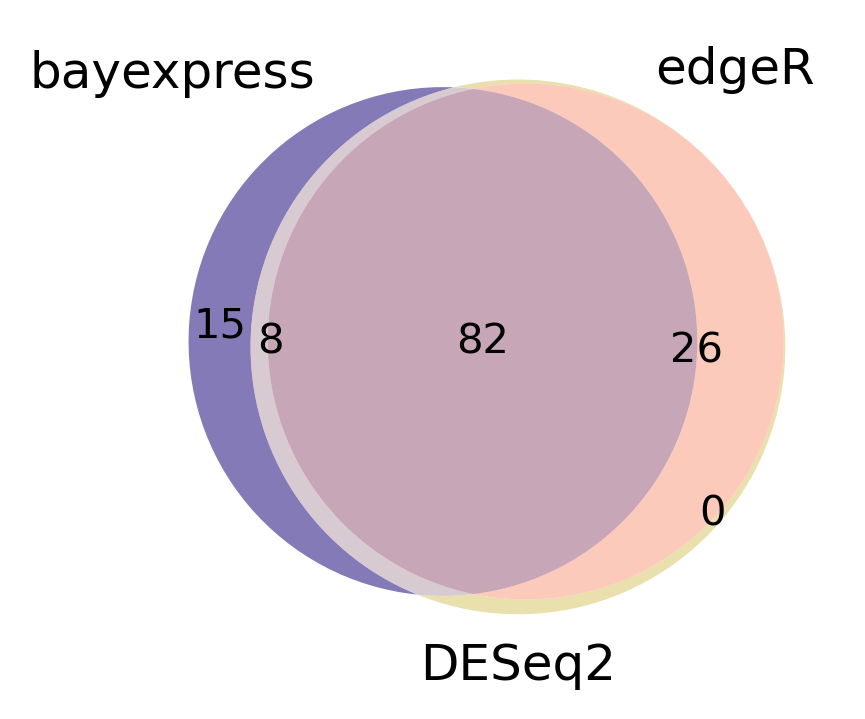

In [23]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255


plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC2_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC2_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()

# exported for paper as FC2.png

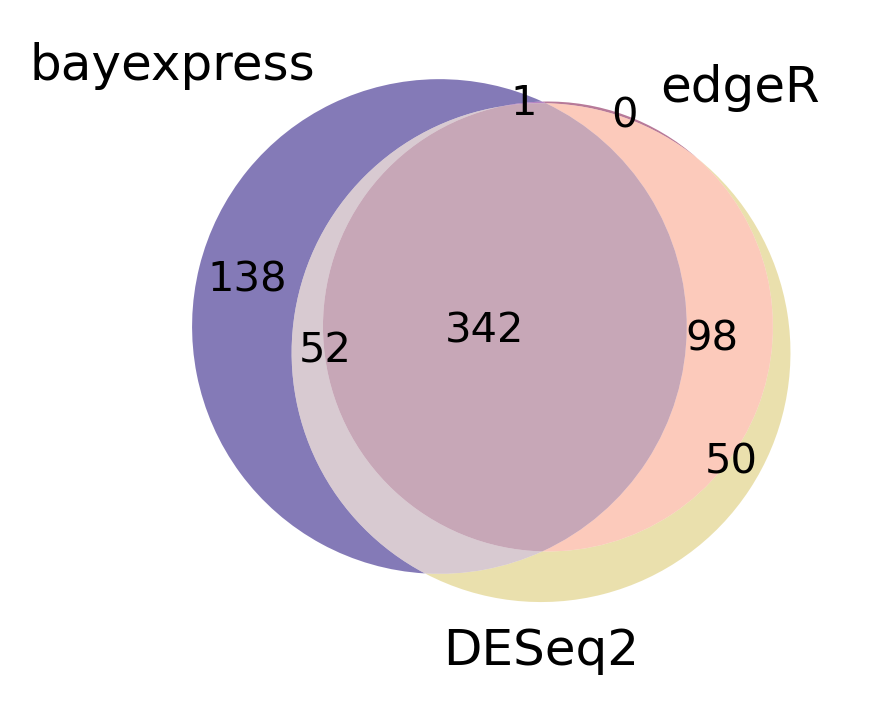

In [24]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255

plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC1_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC1_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()
# exported for paper as FC1.png

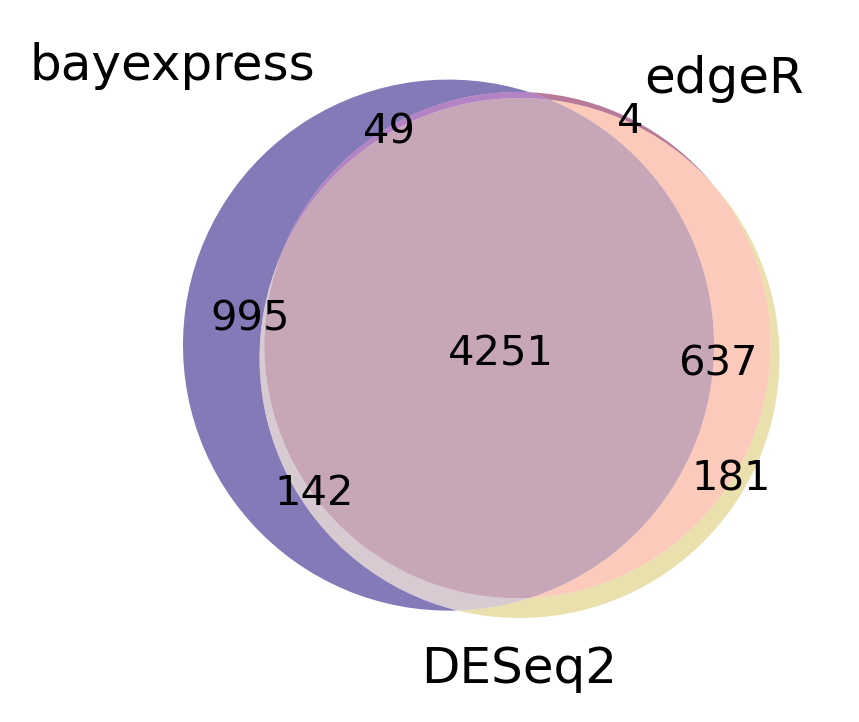

In [25]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255

plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC0_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC0_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()
# exported for paper as FC0.png

In [37]:
# Which ones are positive in bayexpress but not the other 2?
# DEG = 'statistically significant change' & | log2 fold change | > 2

display(counts_RALL.loc[list(RALL.loc[(RALL.FC2_bayexpress == True) & (RALL.FC2_edgeR != True) & (RALL.FC2_DESeq2 != True)].locus_name)])


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YCL048W,10,17,15,27,20,28,14,13,21,15,...,134,73,128,57,83,92,77,71,103,61
YFL058W,19,16,15,19,14,32,16,28,11,11,...,141,93,129,71,85,99,82,76,95,50
YGL034C,5,16,2,6,6,13,5,4,7,12,...,88,34,31,19,42,43,16,32,55,30
YHR007C-A,10,19,19,18,17,53,14,9,18,16,...,158,86,88,74,91,105,74,89,111,100
YIR017C,1,3,0,3,0,0,0,2,0,0,...,10,5,5,1,4,2,5,4,8,12
YJL077C,83,79,95,150,99,169,89,114,81,102,...,806,451,621,364,580,494,487,471,485,419
YJR078W,35,40,30,87,35,55,33,47,51,25,...,335,172,284,143,183,193,156,166,209,180
YJR095W,10,12,8,9,10,21,14,13,12,8,...,65,50,56,29,57,64,42,44,57,42
YKR039W,425,291,377,467,291,567,327,491,319,352,...,3425,1834,2151,1277,1558,1882,1227,1570,1832,1126


In [38]:
# Which ones are positive in DESeq2 and edgeR but not bayexpress?
# DEG = 'statistically significant change' & | log2 fold change | > 2

display(counts_RALL.loc[list(RALL.loc[(RALL.FC2_bayexpress != True) & (RALL.FC2_edgeR == True) & (RALL.FC2_DESeq2 == True)].locus_name)])


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,2114,1725,1485,3013,1544,2846,1915,2976,2486,1792,...,944,526,805,489,662,575,511,491,557,443
YBL005W-B,1399,1894,1487,2379,2024,4398,2416,2406,1700,2192,...,1139,564,618,475,596,612,528,610,616,449
YBR012W-B,1150,1603,1288,1986,1670,3471,1924,1957,1431,1753,...,1022,530,570,417,493,516,415,539,569,441
YDR055W,1837,1867,2279,3938,1706,3432,2472,2531,2330,1755,...,1206,645,866,559,837,833,589,632,749,592
YDR098C-B,1426,1832,1345,2217,1814,3911,2307,2452,1793,2058,...,1034,546,655,469,551,604,513,597,639,479
YDR210C-D,1428,1911,1399,2331,1848,4059,2355,2454,1891,2123,...,1085,617,638,526,646,600,531,637,579,496
YDR406W,1481,2075,2077,2401,1787,4019,1931,2751,2230,2312,...,1223,598,734,479,717,740,589,653,759,479
YER160C,1405,1875,1408,2214,1922,4009,2354,2503,1747,2110,...,1037,606,568,445,549,540,414,553,532,382
YFR053C,9685,5001,11321,14364,4351,8942,5786,14325,8574,5428,...,5706,3325,5086,2118,2695,3890,1867,1791,3242,1333


Text(0, 0.5, 'log2 fold change (DESeq2)')

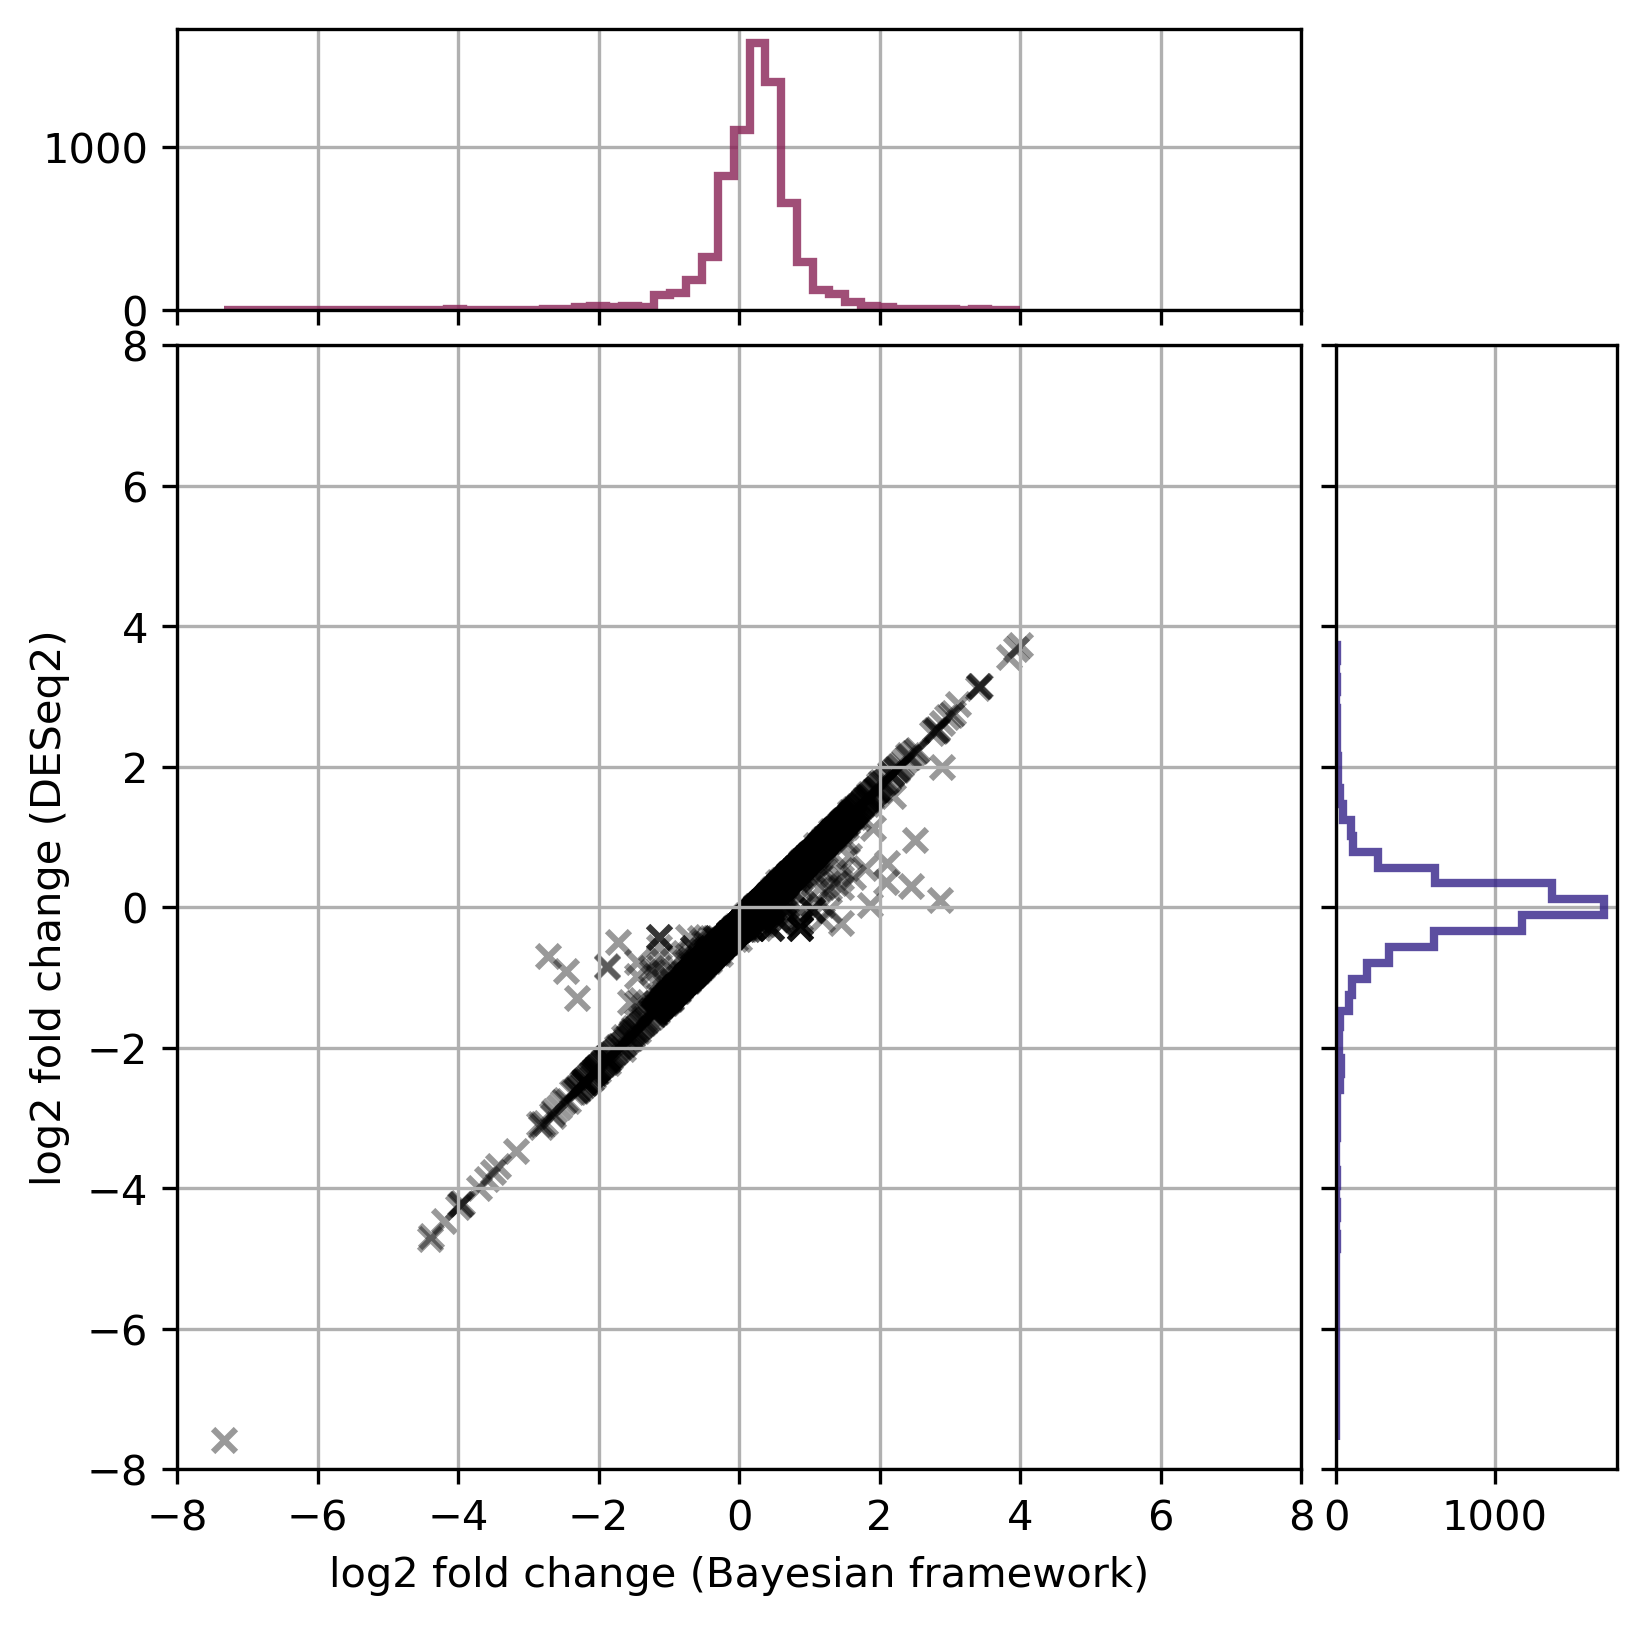

In [28]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.FC, RALL.log2FoldChange, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.FC, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.log2FoldChange, 
              
              bins=50, histtype='step', color='#332288', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (Bayesian framework)')
ax.set_ylabel('log2 fold change (DESeq2)')


Text(0, 0.5, 'log2 fold change (edgeR)')

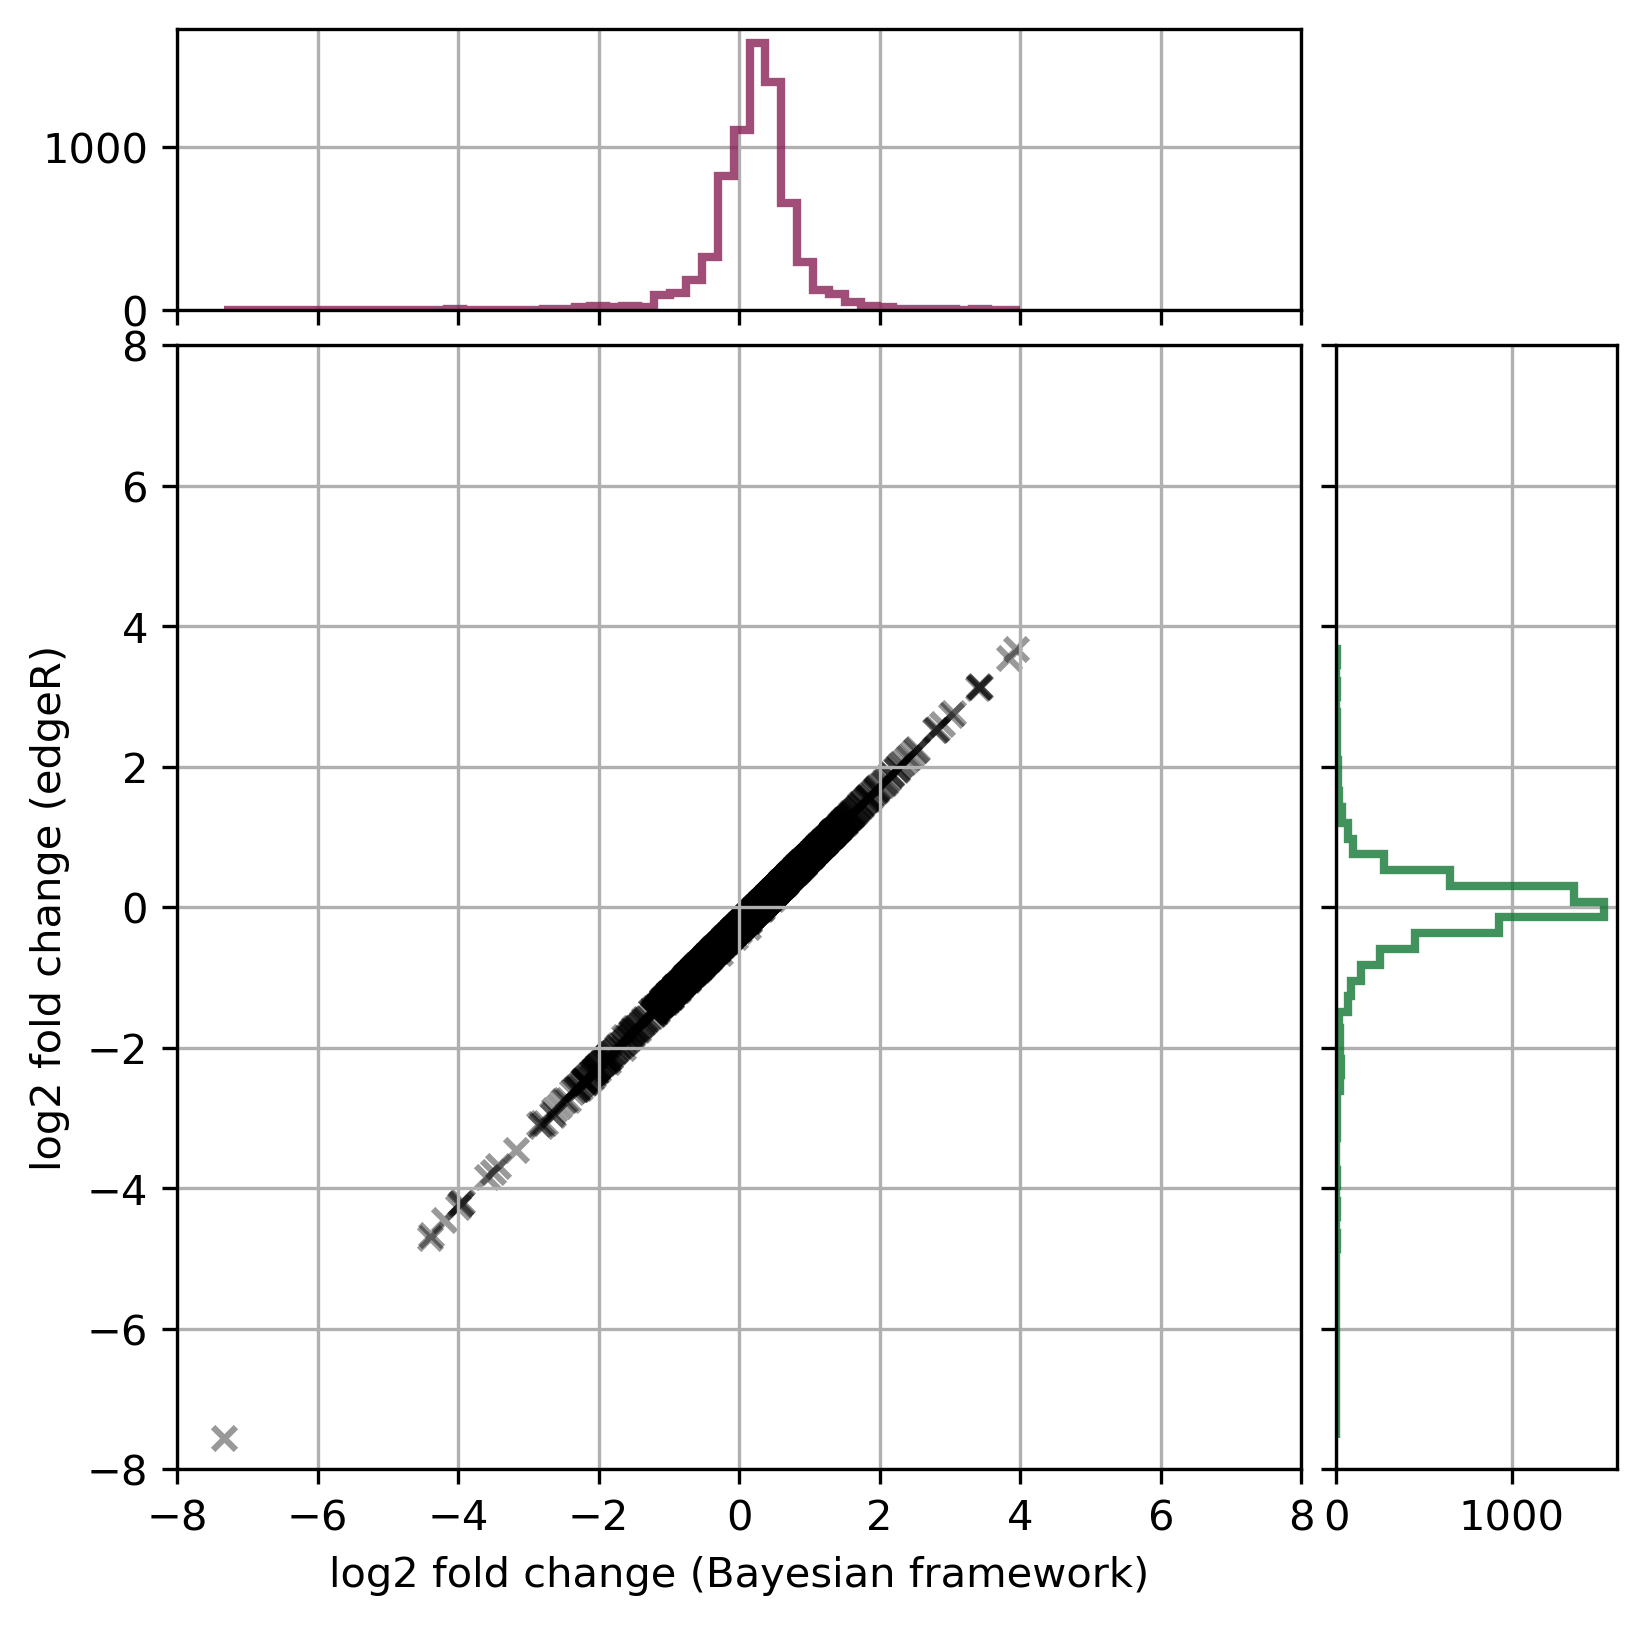

In [29]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.FC, RALL.logFC, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.FC, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.logFC, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (Bayesian framework)')
ax.set_ylabel('log2 fold change (edgeR)')


Text(0, 0.5, 'log2 fold change (edgeR)')

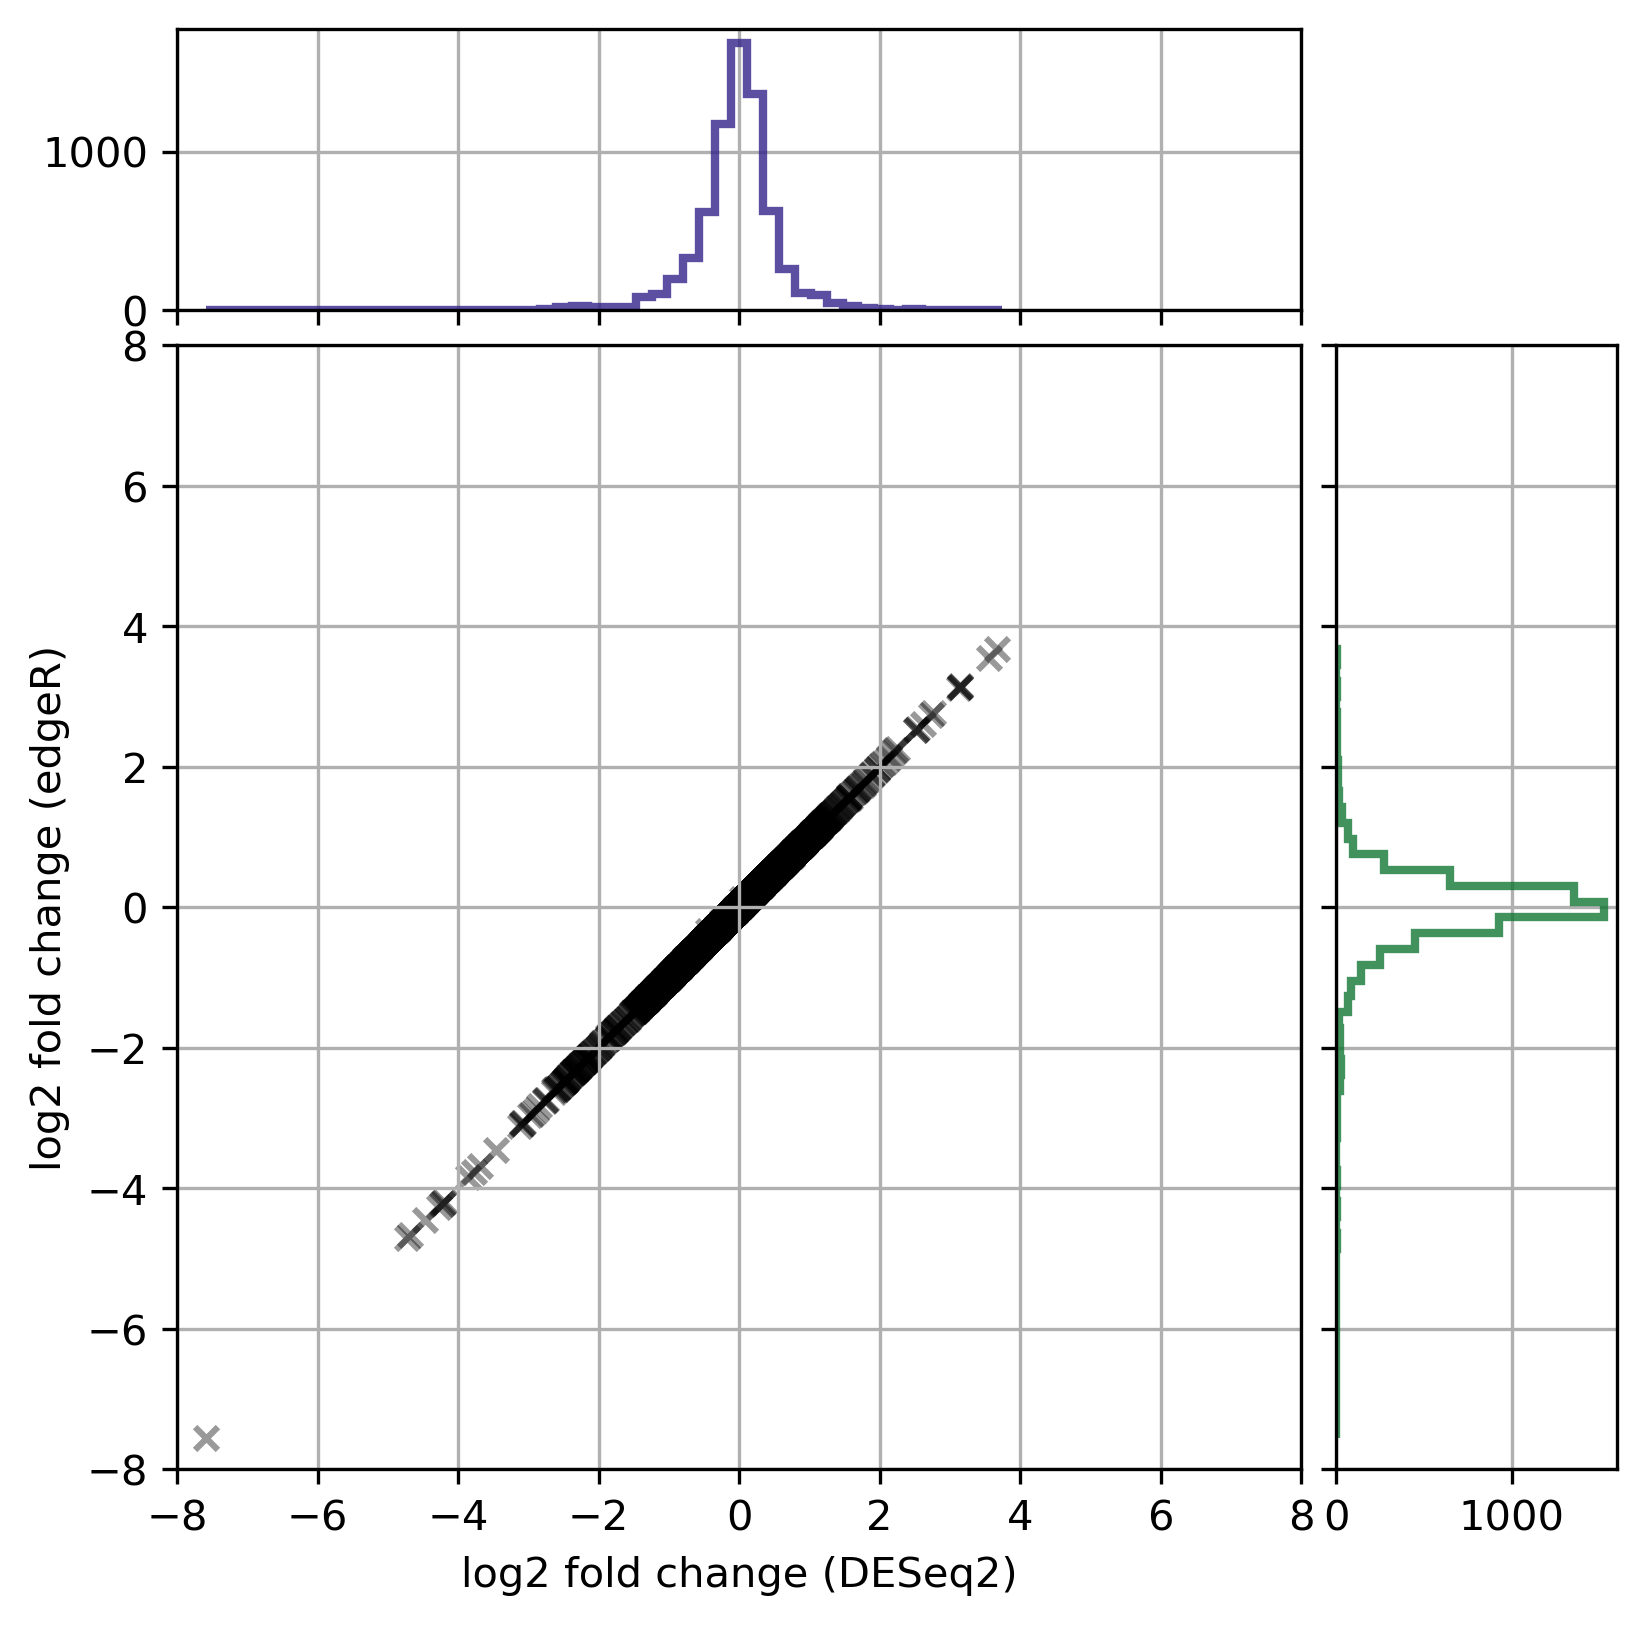

In [30]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.log2FoldChange, RALL.logFC, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.log2FoldChange, 
              
              bins=50, histtype='step', color='#332288', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.logFC, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (DESeq2)')
ax.set_ylabel('log2 fold change (edgeR)')


In [31]:
# Checking the ones where the fold change doesn't match

display(RALL.loc[((RALL.FC - RALL.log2FoldChange) > 0.5)])

counts_RALL.loc[list(RALL.loc[((RALL.FC - RALL.log2FoldChange) > 0.5)].locus_name)]

# Hah, okay that's Laplace?

# And no deviation with edgeR is explained as they filter out genes with zeros


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange
15,Q0070,False,False,False,0.446801,NaN,NaN,NaN,NaN,False,False,False,-0.295268
23,Q0120,False,False,False,1.446801,NaN,NaN,NaN,NaN,False,False,False,0.525250
32,Q0255,False,False,False,1.861839,NaN,NaN,NaN,NaN,False,False,False,0.032621
139,YAL066W,False,False,False,1.084231,NaN,NaN,NaN,NaN,False,False,False,0.403601
660,YCL018W,False,False,False,0.861839,NaN,NaN,NaN,NaN,False,False,False,-0.292145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,tT(CGU)K,False,False,False,1.031764,NaN,NaN,NaN,NaN,False,False,False,-0.039199
7118,tY(GUA)F1,False,False,False,0.627373,NaN,NaN,NaN,NaN,False,False,False,0.073552
7120,tY(GUA)J1,False,False,False,0.861839,NaN,NaN,NaN,NaN,False,False,False,-0.042322
7121,tY(GUA)J2,False,False,False,0.861839,NaN,NaN,NaN,NaN,False,False,False,-0.042322


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
Q0070,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Q0120,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,2,1,1,0,0,0
Q0255,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
YAL066W,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,2
YCL018W,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tT(CGU)K,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
tY(GUA)F1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
tY(GUA)J1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,2,0,0,0,0
